# Initialize

In [ ]:
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}\usepackage{amsfonts}\usepackage{bm}']
from matplotlib.lines import Line2D


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib import animation
from matplotlib.lines import Line2D
import numpy as np
import os
import pickle
%matplotlib inline

images_path = '/content/drive/My Drive/Simulations in Stat learning/images/'
videos_path = '/content/drive/My Drive/Simulations in Stat learning/videos/circle_formula/'
data_path = '/content/drive/My Drive/Simulations in Stat learning/data/'


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

## Helper functions


In [ ]:
def errors_on_hypothesis_set(data,hypothesis):
    intermediate = np.matmul(data[:,:2], hypothesis)
    predictions = np.where(intermediate > 0.0, 1, 0)
    labels = data[:,2]

    E_out = np.logical_xor(predictions.T,labels)
    true_errors = 1 - np.sum(E_out,axis=1)/E_out.shape[1]
    
    return true_errors,E_out[:8,:],predictions[:,:8]  #this depends on which all hypothesis I want to animate on

In [ ]:
def get_guarantee_finite(n, e , h):
    return 2.0 *h * np.exp(-2 * n * e * e)

In [ ]:
def get_radius(m):
  area_of_square = .8*.8
  upperbound = get_guarantee_finite(m,0.1,1)
  area_of_circle = upperbound*area_of_square
  radius = np.sqrt(area_of_circle/3.14)

  circle_text = "%.2f" % upperbound

  return radius,circle_text

# Circle Size decrease

In [ ]:
starting_m = 90
ending_m = 310
circle_only = True
number_of_hypothesis = 4

#Useful for file naming
diff = starting_m
frames = ending_m - starting_m +1 
name = str(starting_m)+"to"+str(ending_m)+"red_circle"


In [ ]:

if circle_only:
  circle_rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False,
      "axes.facecolor": 'blue',
      'savefig.facecolor':'blue',
      "figure.figsize" : (24,18),
      'axes.linewidth' : 7}


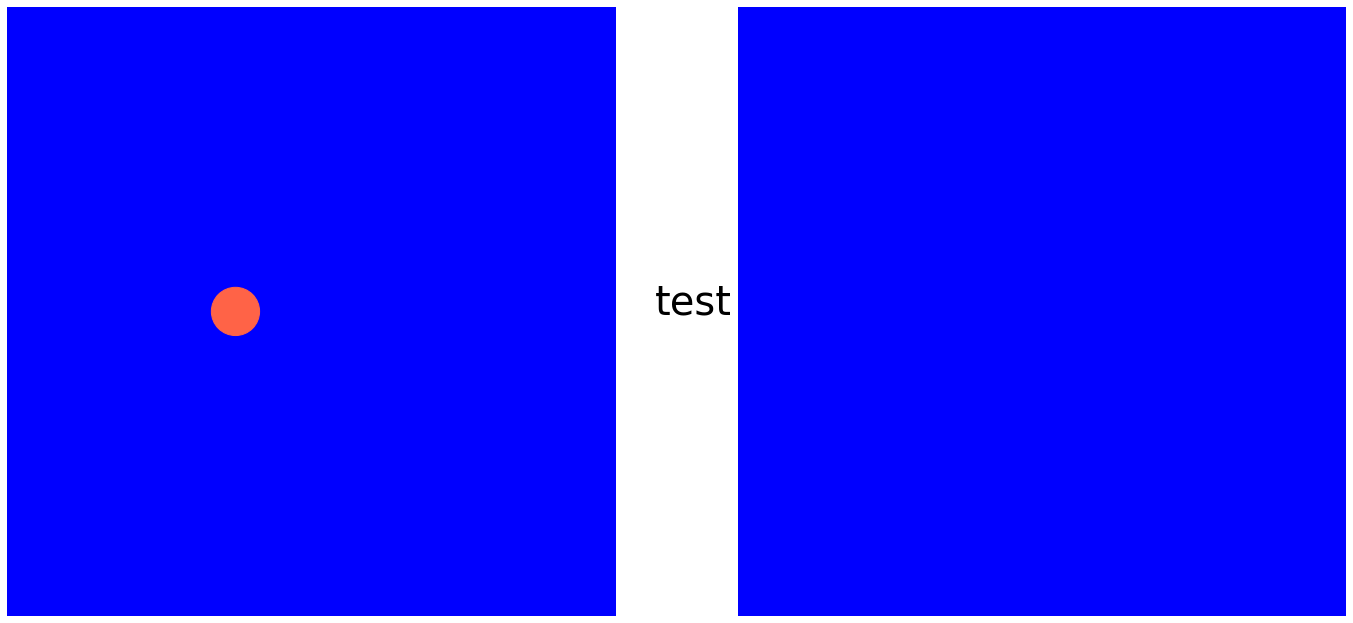

In [ ]:
#
if circle_only:
  with plt.rc_context(circle_rc):
  
    #plt.autoscale(False)
    fig,axs = plt.subplots(1,2)
    axs[0].set_xlim([-0.4, 0.4])
    axs[0].set_ylim([-0.4, 0.4])
    axs[0].set_aspect(aspect='equal', adjustable='box')

    axs[1].set_xlim([-0.4, 0.4])
    axs[1].set_ylim([-0.4, 0.4])
    axs[1].set_aspect(aspect='equal', adjustable='box')

    circle1=plt.Circle((-0.1,0),0.0317,color='tomato',fill=True, clip_on = False)
    circle = axs[0].add_artist(circle1)

    m_text = axs[1].text(0.5,0.5, "test", transform=plt.gcf().transFigure,ha="left",fontsize=40)


    #label = axs[0].annotate("0.27", xy=(-0.1, 0), fontsize=30, ha="center")

    



Animation:

In [ ]:
def update_dataset_space(i,diff):
  m = i+diff
  radius,circle_text = get_radius(m)

  circle.set_radius(radius)
 # label.set_text(circle_text)
  m_text.set_text(str(m))

  return circle,

In [ ]:
if circle_only:
  ani = animation.FuncAnimation(fig , update_dataset_space,frames=frames, fargs=(diff,),
                                          interval=10, blit=False, repeat=False)
  filename = videos_path +name+'_'+'.mp4'
  ani.save(filename, fps=10, extra_args=['-vcodec', 'libx264'],savefig_kwargs=dict(facecolor='blue'))


# Dataset Space Frame

In [ ]:
from matplotlib import patheffects


datasetspace_rc = {   #this is the one ..
        "xtick.bottom" : False,
        "xtick.labelbottom" : False,
        "xtick.labelsize" : 12,
        'xtick.major.pad' : '7',
        "ytick.labelleft" : False,
        "ytick.labelsize" : 12,
        'ytick.major.pad' : '7',
        "ytick.left" : False,
        "figure.figsize" : (24,18),
        'axes.linewidth' : 7,
        "axes.facecolor": 'white',
        'savefig.facecolor':'blue',
        'text.usetex' : True,



        }


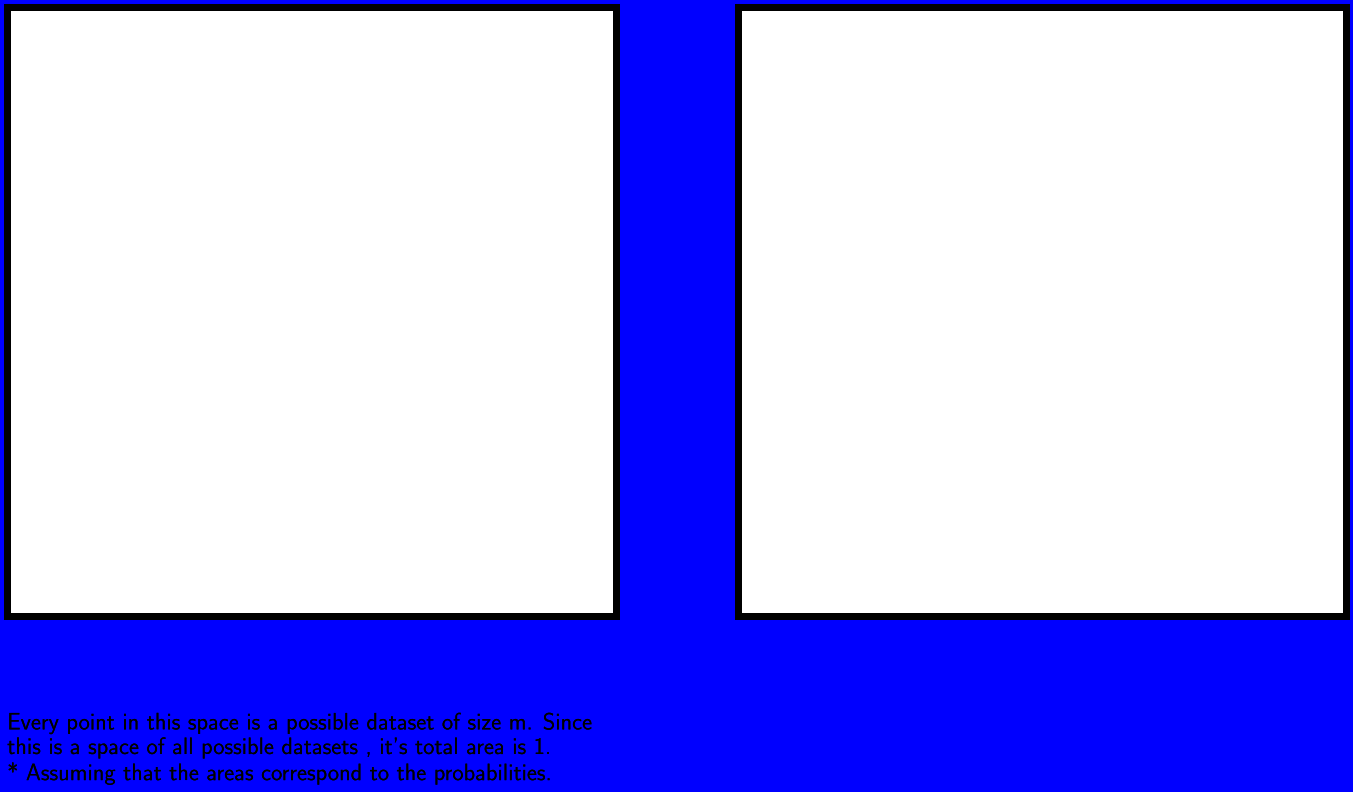

In [ ]:

#with plt.xkcd(3,randomness = 8):
with plt.rc_context(datasetspace_rc):    
   # plt.rcParams.update(datasetspace_rc)
    plt.rcParams['path.effects'] = [patheffects.withStroke(linewidth=0)]
    fig,axs = plt.subplots(1,2)
    fig.patch.set_facecolor('blue')
    
    axs[0].set_xlim([-0.4, 0.4])
    axs[0].set_ylim([-0.4, 0.4])
    axs[0].set_aspect(aspect='equal', adjustable='box')

    axs[1].set_xlim([-0.4, 0.4])
    axs[1].set_ylim([-0.4, 0.4])
    axs[1].set_aspect(aspect='equal', adjustable='box')

    #for one hypothesis
    #line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="white")
    #line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    #l=axs[0].legend((line1,line2),(r'$|{E}_{train}(h)-{E}_{true}(h)|<\bm{\varepsilon}$',r'$|{E}_{train}(h)-{E}_{true}(h)|>\bm{\varepsilon$'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.7, 1.05),ncol=1, fancybox=True, shadow=True)
   # frame = l.get_frame()
   # frame.set_edgecolor('black')

    #for multiple hypothesis
    #line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="white")
    #line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    #l=axs[0].legend((line1,line2),(r'$for\enspace all \enspace {h}\in{H}, \quad\quad\quad\enspace|{E}_{train}(h)-{E}_{true}(h)|<\bm{\varepsilon}$',r'$there \enspace exists \enspace {h}\in{H}, \quad|{E}_{train}(h)-{E}_{true}(h)|>\bm{\varepsilon} $'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=1, fancybox=True, shadow=True)
    #frame = l.get_frame()
    #frame.set_edgecolor('black')

    #for e representative
    #line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="white")
   # line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    #l=axs[0].legend((line1,line2),(r'$\bm{\varepsilon}\--representative\enspace dataset$',r'$there \enspace exists \enspace {h}\in{H}, \quad|{E}_{train}(h)-{E}_{true}(h)|>\bm{\varepsilon} $'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=1, fancybox=True, shadow=True)
    #frame = l.get_frame()
    #frame.set_edgecolor('black')


    #text and axis labels
    axs[0].xaxis.set_major_locator(plt.MaxNLocator(3))
    axs[0].yaxis.set_major_locator(plt.MaxNLocator(3))
    axs[0].set_xlabel('',fontsize = 20,labelpad=10)
    axs[0].set_ylabel('',fontsize = 20,labelpad=1)
  

    #axs[0].set_title("Dataset Space ( illustration )",y = -0.15,fontsize = 30)
   
    txt="Every point in this space is a possible dataset of size m. Since\nthis is a space of all possible datasets , it's total area is 1. \n * Assuming that the areas correspond to the probabilities."
    axs[0].text(-0.40, -0.616, txt, ha='left',fontsize = 24)
    fig.savefig(images_path+"datasetspace_single.png")#,facecolor='blue'



Animation:

In [ ]:
def update_dataset_space(i,diff):
  m = i+diff
  radius,circle_text = get_radius(m)

  circle.set_radius(radius)
  label.set_text(circle_text)
  m_text.set_text(str(m))

  return circle,label,

In [ ]:
if circle_only:
  ani = animation.FuncAnimation(fig , update_dataset_space,frames=frames, fargs=(diff,),
                                          interval=10, blit=False, repeat=False)
  filename = videos_path +"datasetspace_"+name+'_'+'.mp4'
  ani.save(filename, fps=10, extra_args=['-vcodec', 'libx264'],savefig_kwargs=dict(facecolor='blue'))

else:
  fig.savefig(images_path+"datasetspace_frame.png")


# Captions and legends practice

In [ ]:

from matplotlib.lines import Line2D

rc = {
        "xtick.bottom" : True,
        "xtick.labelbottom" : True,
        "xtick.labelsize" : 12,
        'xtick.major.pad' : '7',
        "ytick.labelleft" : True,
        "ytick.labelsize" : 12,
        'ytick.major.pad' : '7',
        "ytick.left" : True,
        "figure.figsize" : (24,18),
        'axes.linewidth' : 7,
        "axes.facecolor": 'white',
        'savefig.facecolor':'blue',
        'text.usetex' : True,

        }




## Feature space

In [ ]:
black_white = False

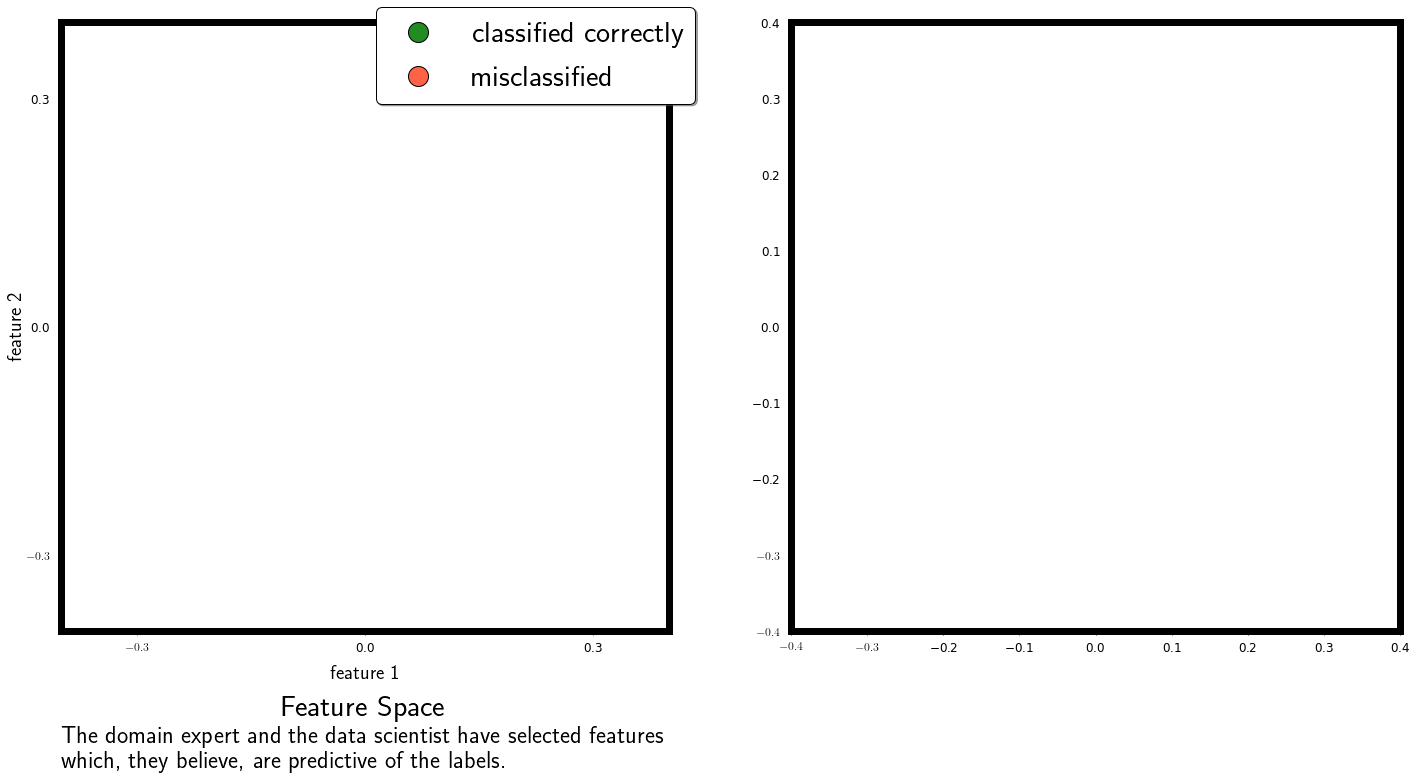

In [ ]:
with plt.rc_context(rc):
  fig,axs = plt.subplots(1,2)
  axs[0].set_xlim([-0.4, 0.4])
  axs[0].set_ylim([-0.4, 0.4])
  axs[0].set_aspect(aspect='equal', adjustable='box')

  axs[1].set_xlim([-0.4, 0.4])
  axs[1].set_ylim([-0.4, 0.4])
  axs[1].set_aspect(aspect='equal', adjustable='box')

#legend control
  if black_white:

    line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="lightgrey")
    line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="black")
    l=axs[0].legend((line1,line2),('label a','label b'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.9, 1.05),ncol=1, fancybox=True, shadow=True)
    frame = l.get_frame()
    #frame.set_facecolor('white')
    frame.set_edgecolor('black')
  else:
    line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="forestgreen")
    line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    l=axs[0].legend((line1,line2),('classified correctly','misclassified'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.78, 1.05),ncol=1, fancybox=True, shadow=True)
    frame = l.get_frame()
    #frame.set_facecolor('white')
    frame.set_edgecolor('black')



  #Caption ,title control
  axs[0].xaxis.set_major_locator(plt.MaxNLocator(3))
  axs[0].yaxis.set_major_locator(plt.MaxNLocator(3))
  axs[0].set_xlabel('feature 1',fontsize = 20,labelpad=10)
  axs[0].set_ylabel('feature 2',fontsize = 20,labelpad=1)
  axs[0].set_title("Feature Space",y = -0.15,fontsize = 30)
  txt="The domain expert and the data scientist have selected features\n which, they believe, are predictive of the labels."
  axs[0].text(-0.40, -0.58, txt, ha='left',fontsize = 24)  

## Hypothesis Space

In [ ]:
grey_only = True

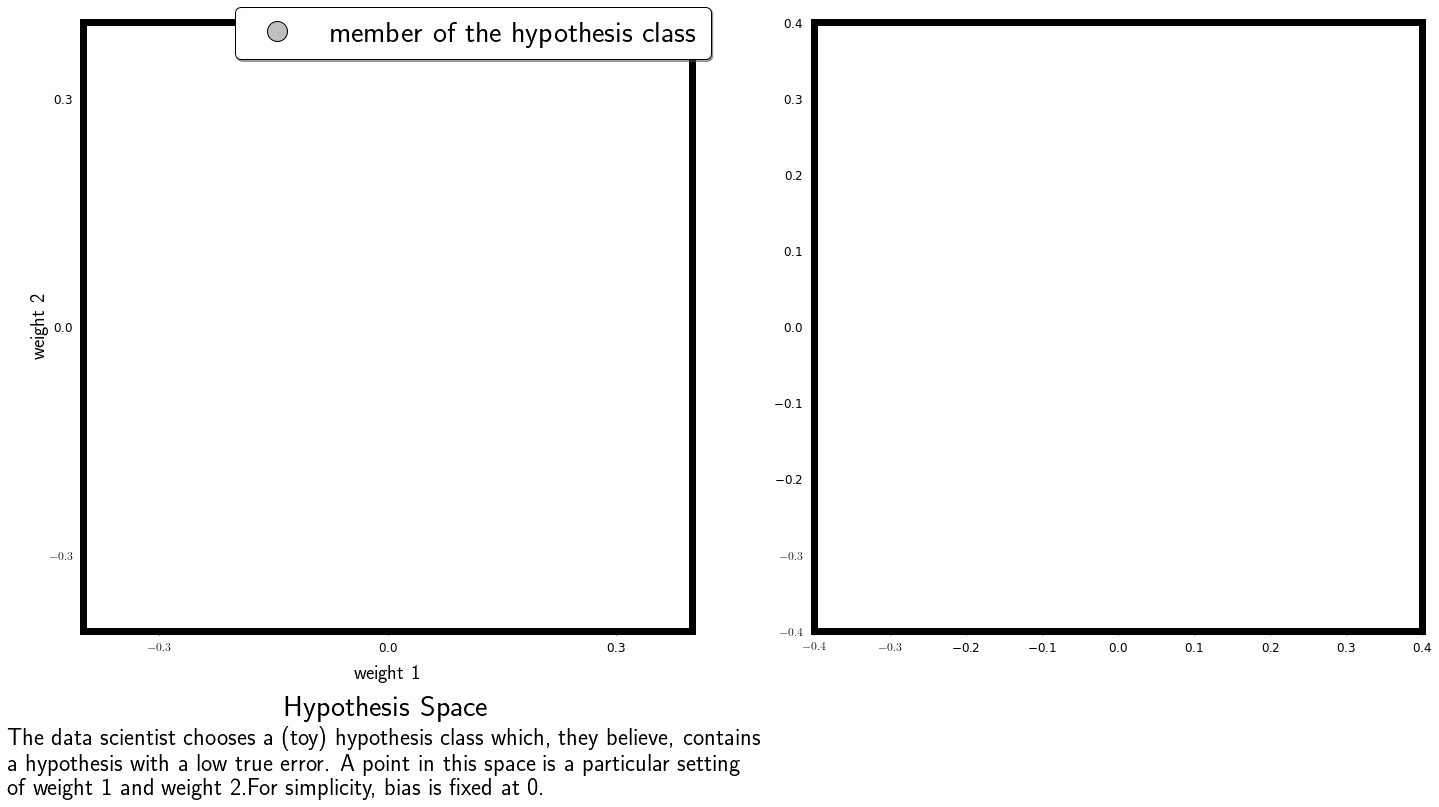

In [ ]:

with plt.rc_context(rc):
  fig,axs = plt.subplots(1,2)
  axs[0].set_xlim([-0.4, 0.4])
  axs[0].set_ylim([-0.4, 0.4])
  axs[0].set_aspect(aspect='equal', adjustable='box')

  axs[1].set_xlim([-0.4, 0.4])
  axs[1].set_ylim([-0.4, 0.4])
  axs[1].set_aspect(aspect='equal', adjustable='box')

  if grey_only:
    line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="silver")
    #line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    l=axs[0].legend([line1],[r'$ \text{member of the hypothesis class}$'],prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.64, 1.05),ncol=1, fancybox=True, shadow=True)
    #l=axs[0].legend((line1,line2),(r'$ \text{diff}<\bm{\varepsilon}$',r'$ \text{diff}>\bm{\varepsilon}$'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.9, 1.05),ncol=1, fancybox=True, shadow=True)
    frame = l.get_frame()
    frame.set_edgecolor('black')
  else:
    line1 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20, markerfacecolor="silver")
    line2 = Line2D(range(1), range(1), linewidth=0,color="black", marker='o',markersize=20,markerfacecolor="tomato")
    l=axs[0].legend((line1,line2),(r'$ \text{member of the hypothesis class}$',r'$ \text{mislead by the dataset}$'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.64, 1.05),ncol=1, fancybox=True, shadow=True)
    #l=axs[0].legend((line1,line2),(r'$ \text{diff}<\bm{\varepsilon}$',r'$ \text{diff}>\bm{\varepsilon}$'),prop={'size': 30},frameon=True,loc='upper center', bbox_to_anchor=(0.9, 1.05),ncol=1, fancybox=True, shadow=True)
    frame = l.get_frame()
    frame.set_edgecolor('black')

  
  #text and axis labels
  axs[0].xaxis.set_major_locator(plt.MaxNLocator(3))
  axs[0].yaxis.set_major_locator(plt.MaxNLocator(3))
  axs[0].set_xlabel('weight 1',fontsize = 20,labelpad=10)
  axs[0].set_ylabel('weight 2',fontsize = 20,labelpad=1)
  axs[0].set_title("Hypothesis Space",y = -0.15,fontsize = 30)
  txt="The data scientist chooses a (toy) hypothesis class which, they believe, contains\n a hypothesis with a low true error. A point in this space is a particular setting\n of weight 1 and weight 2.For simplicity, bias is fixed at 0."
  axs[0].text(-0.5, -0.616, txt, ha='left',fontsize = 24) 

In [ ]:

fig.savefig(images_path+"hypothesisspace_test.png",facecolor='blue')